In [9]:
import pandas as pd 
from sklearn.model_selection import train_test_split
# for pipelines
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# for cross_validation
from sklearn.model_selection import cross_val_score

In [4]:
train_data = pd.read_csv('..\data\homes.csv', index_col='Id')
test_data = pd.read_csv('..\data\home_test.csv', index_col='Id')


In [5]:
# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)


In [13]:
# Select numeric columns only
numeric_cols = [cols for cols in train_data.columns if train_data[cols].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [16]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('preds', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [17]:
# Multiply by -1 since sklearn calculates *negative* MAE

score = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

In [18]:
score.mean()

18276.410356164386

***
## Step 1: Write a useful function
In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in `X` and `y` to create folds,
- `SimpleImputer()` (with all parameters left as default) to replace missing values, and
- `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.  

In [24]:
def get_scores(n_estimators):
    my_pipelines = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipelines, X, y, cv=5, scoring='neg_mean_absolute_error')
    return scores.mean()

In [25]:
result = {}
for i in range(1,9):
    result[50*i] = get_scores(50*i)

***
## Step 2: Find the best parameter value

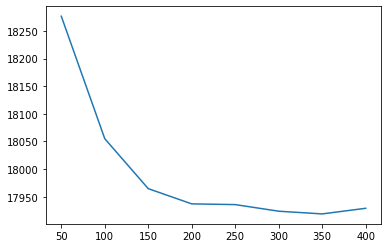

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(result.keys()), list(result.values()))
plt.show()